In [19]:
import pandas as pd
energy_df=pd.read_csv('datos.csv', sep=';', usecols=['datetime','name','value'])
energy_df      

,name,value,datetime
0,Demanda programada P48 total,20058.667,2023-01-01T00:00:00+01:00
1,Demanda programada P48 total,19237.725,2023-01-01T01:00:00+01:00
2,Demanda programada P48 total,18147.283,2023-01-01T02:00:00+01:00
3,Demanda programada P48 total,17038.350,2023-01-01T03:00:00+01:00
4,Demanda programada P48 total,16463.475,2023-01-01T04:00:00+01:00
...,...,...,...
16232,Generación medida Turbinación bombeo,1300.778,2023-01-31T19:00:00+01:00
16233,Generación medida Turbinación bombeo,1668.581,2023-01-31T20:00:00+01:00
16234,Generación medida Turbinación bombeo,1378.942,2023-01-31T21:00:00+01:00
16235,Generación medida Turbinación bombeo,635.945,2023-01-31T22:00:00+01:00


In [20]:
demand_removed_df=energy_df[energy_df['name'].str.startswith('Demanda programada')==False]
demand_removed_df


,name,value,datetime
6851,Generación medida Biogás,83.937,2023-01-01T00:00:00+01:00
6852,Generación medida Biogás,81.609,2023-01-01T01:00:00+01:00
6853,Generación medida Biogás,80.939,2023-01-01T02:00:00+01:00
6854,Generación medida Biogás,80.873,2023-01-01T03:00:00+01:00
6855,Generación medida Biogás,80.765,2023-01-01T04:00:00+01:00
...,...,...,...
16232,Generación medida Turbinación bombeo,1300.778,2023-01-31T19:00:00+01:00
16233,Generación medida Turbinación bombeo,1668.581,2023-01-31T20:00:00+01:00
16234,Generación medida Turbinación bombeo,1378.942,2023-01-31T21:00:00+01:00
16235,Generación medida Turbinación bombeo,635.945,2023-01-31T22:00:00+01:00


In [21]:
import plotly.express as px
#graph_df=demand_removed_df[demand_removed_df['datetime'].str.match('2023-01-01T')]
graph_df=demand_removed_df
demanda_df=graph_df[graph_df['name'].str.startswith('Demanda en consumo')]
demanda_df


,name,value,datetime
12059,Demanda en consumo,16742.660,2023-01-01T00:00:00+01:00
12060,Demanda en consumo,16204.409,2023-01-01T01:00:00+01:00
12061,Demanda en consumo,15222.482,2023-01-01T02:00:00+01:00
12062,Demanda en consumo,14354.542,2023-01-01T03:00:00+01:00
12063,Demanda en consumo,13792.577,2023-01-01T04:00:00+01:00
...,...,...,...
12798,Demanda en consumo,32111.807,2023-01-31T19:00:00+01:00
12799,Demanda en consumo,32949.631,2023-01-31T20:00:00+01:00
12800,Demanda en consumo,31957.922,2023-01-31T21:00:00+01:00
12801,Demanda en consumo,28823.235,2023-01-31T22:00:00+01:00


In [22]:
generacion_df=graph_df[graph_df['name'].str.startswith('Demanda en consumo')==False]
generacion_df

,name,value,datetime
6851,Generación medida Biogás,83.937,2023-01-01T00:00:00+01:00
6852,Generación medida Biogás,81.609,2023-01-01T01:00:00+01:00
6853,Generación medida Biogás,80.939,2023-01-01T02:00:00+01:00
6854,Generación medida Biogás,80.873,2023-01-01T03:00:00+01:00
6855,Generación medida Biogás,80.765,2023-01-01T04:00:00+01:00
...,...,...,...
16232,Generación medida Turbinación bombeo,1300.778,2023-01-31T19:00:00+01:00
16233,Generación medida Turbinación bombeo,1668.581,2023-01-31T20:00:00+01:00
16234,Generación medida Turbinación bombeo,1378.942,2023-01-31T21:00:00+01:00
16235,Generación medida Turbinación bombeo,635.945,2023-01-31T22:00:00+01:00


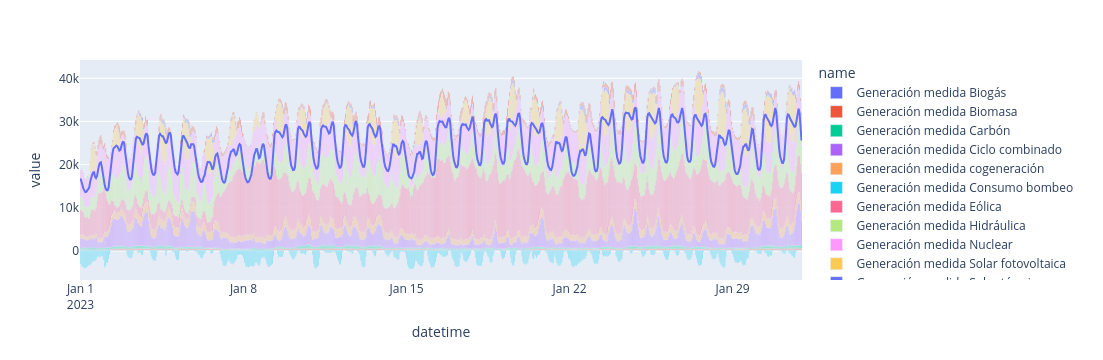

In [23]:
fig=px.bar(generacion_df, x='datetime', y='value', color='name')
fig.add_traces(list(px.line(demanda_df, x='datetime', y='value').select_traces()))
fig.show()